## Download and extract training and validation data

The task here is to build and train a Convolutional Neural Network that can classify images as either horses or humans.

In [1]:
import os
import requests
import shutil
import zipfile

In [2]:
DATA_DIR = "/Users/rakesh.karanth/DeepLearning/TensorFlowInPractice/Course1/dataset"
EXPERIMENT_DIR = os.path.join(DATA_DIR, "horses_or_humans")
TRAINING_DATA_DIR = os.path.join(EXPERIMENT_DIR, "training")
VALIDATION_DATA_DIR = os.path.join(EXPERIMENT_DIR, "validation")

# Check if "necessary directories" have to be created locally
for directory in [DATA_DIR, EXPERIMENT_DIR, TRAINING_DATA_DIR, VALIDATION_DATA_DIR]:
    if not os.path.isdir(directory):
        print ("Creating directory {}".format(directory))
        os.makedirs(directory)
    else:
        print ("{} already present".format(directory))

print ()
        
TRAINING_ZIP_FILE = "horse-or-human.zip"
TRAINING_ZIP_FILE_COMPLETE_PATH = os.path.join(DATA_DIR, TRAINING_ZIP_FILE)
TRAINING_RESOURCE_URL = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
# Check to see if you need to download TRAINING_ZIP_FILE
if not os.path.isfile(TRAINING_ZIP_FILE_COMPLETE_PATH):
    print ("Downloading {}".format(TRAINING_ZIP_FILE))
    with requests.get(TRAINING_RESOURCE_URL, stream=True) as r:
        with open(TRAINING_ZIP_FILE_COMPLETE_PATH, "wb") as f:
            shutil.copyfileobj(r.raw, f)
else:
    print ("{} already present".format(TRAINING_ZIP_FILE))

print ()
    
VALIDATION_ZIP_FILE = "validation-horse-or-human.zip"
VALIDATION_ZIP_FILE_COMPLETE_PATH = os.path.join(DATA_DIR, VALIDATION_ZIP_FILE)
VALIDATION_RESOURCE_URL = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"
# Check to see if you need to download VALIDATION_ZIP_FILE
if not os.path.isfile(VALIDATION_ZIP_FILE_COMPLETE_PATH):
    print ("Downloading {}".format(VALIDATION_ZIP_FILE))
    with requests.get(VALIDATION_RESOURCE_URL, stream=True) as r:
        with open(VALIDATION_ZIP_FILE_COMPLETE_PATH, "wb") as f:
            shutil.copyfileobj(r.raw, f)
else:
    print ("{} already present".format(VALIDATION_ZIP_FILE))

print ()    
    
# Extract the training data
print ("Extracting Training Data from Zip file")
training_zip = zipfile.ZipFile(TRAINING_ZIP_FILE_COMPLETE_PATH, 'r')
training_zip.extractall(path=TRAINING_DATA_DIR)
training_zip.close()

# Extract the validation data
print ("Extracting Validation Data from Zip file")
validation_zip = zipfile.ZipFile(VALIDATION_ZIP_FILE_COMPLETE_PATH, 'r')
validation_zip.extractall(path=VALIDATION_DATA_DIR)
validation_zip.close()

/Users/rakesh.karanth/DeepLearning/TensorFlowInPractice/Course1/dataset already present
/Users/rakesh.karanth/DeepLearning/TensorFlowInPractice/Course1/dataset/horses_or_humans already present
/Users/rakesh.karanth/DeepLearning/TensorFlowInPractice/Course1/dataset/horses_or_humans/training already present
/Users/rakesh.karanth/DeepLearning/TensorFlowInPractice/Course1/dataset/horses_or_humans/validation already present

horse-or-human.zip already present

validation-horse-or-human.zip already present

Extracting Training Data from Zip file
Extracting Validation Data from Zip file


## List a few files in the training and validation  sub-directories

In [3]:
train_horse_files = os.listdir(os.path.join(TRAINING_DATA_DIR, "horses"))
train_human_files = os.listdir(os.path.join(TRAINING_DATA_DIR, "humans"))

validation_horse_files = os.listdir(os.path.join(VALIDATION_DATA_DIR, "horses"))
validation_human_files = os.listdir(os.path.join(VALIDATION_DATA_DIR, "humans"))

print ("Training Horse Image Names - {}".format(train_horse_files[:5]))
print ("Training Human Image Names - {}".format(train_human_files[:5]))
print ()
print ("Validation Horse Image Names - {}".format(validation_horse_files[:5]))
print ("Validation Human Image Names - {}".format(validation_human_files[:5]))
print ()
print ("# of Training Horse Images = {}".format(len(train_horse_files)))
print ("# of Training Human Images = {}".format(len(train_human_files)))
print ()
print ("# of Validation Horse Images = {}".format(len(validation_horse_files)))
print ("# of Validation Human Images = {}".format(len(validation_human_files)))

Training Horse Image Names - ['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png']
Training Human Image Names - ['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png']

Validation Horse Image Names - ['horse1-204.png', 'horse2-112.png', 'horse3-498.png', 'horse5-032.png', 'horse5-018.png']
Validation Human Image Names - ['valhuman04-20.png', 'valhuman03-01.png', 'valhuman04-08.png', 'valhuman03-15.png', 'valhuman01-04.png']

# of Training Horse Images = 500
# of Training Human Images = 527

# of Validation Horse Images = 128
# of Validation Human Images = 128


## Visualize a few training images

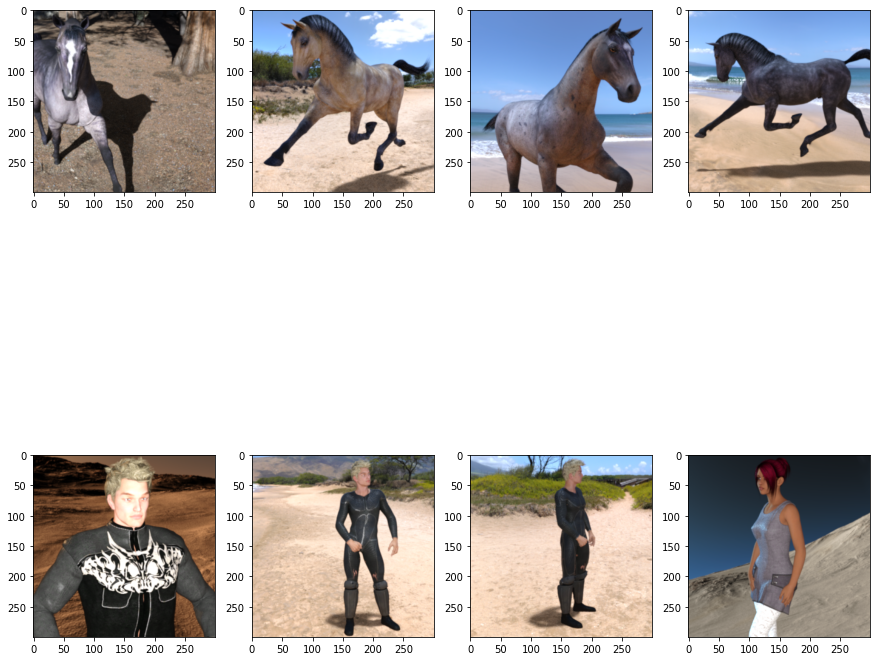

In [4]:
import matplotlib.pyplot as plt

# One row for horses and the other for humans
num_rows = 2
num_images = 4

figure, axes = plt.subplots(nrows=num_rows, ncols=num_images, figsize=(15,15))
for row, r_idx in zip(axes, range(0, 2)):
    # First row is for horses and second is for humans
    if r_idx == 0:
        images_to_plot = [os.path.join(os.path.join(TRAINING_DATA_DIR, "horses"), image)
                          for image in train_horse_files[:num_images]]
    else:
        images_to_plot = [os.path.join(os.path.join(TRAINING_DATA_DIR, "humans"), image)
                          for image in train_human_files[:num_images]]
    
    for column, image in zip(row, images_to_plot):
        image_data = plt.imread(image)
        column.imshow(image_data)

plt.show()

## Data Preprocessing

Set up data generators that will read pictures in the source folder, convert them to float32 tensors, and feed them (along with the labels) to our Neural Network. We need to have one generator for the training data and one for the validation data.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale all image
# Multiplying each value in the tensor by (1.0/255) is the same as dividing by 255
train_data_image_gen = ImageDataGenerator(rescale=1.0/255)
validation_data_image_gen = ImageDataGenerator(rescale=1.0/255)

# Get the actual training data generator
train_generator = train_data_image_gen.flow_from_directory(
    TRAINING_DATA_DIR,
    target_size=(300, 300), # Each image should be of size (300, 300)
    batch_size=128,         # Load images in batches of size 128
    class_mode='binary'     # Since we are dealing with a binary classification problem
)

# Get the actual validation data generator
validation_generator = validation_data_image_gen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(300, 300), # Each image should be of size (300, 300)
    batch_size=32,          # Load images in batches of size 32
    class_mode='binary'     # Since we are dealing with a binary classification problem
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Get the training image labels

In [6]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

### Get the validation image labels

To verify if the labels match between training and validation. 

In [7]:
validation_generator.class_indices

{'horses': 0, 'humans': 1}

## Build a Convolutional Neural Network

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential()

# Create a Convolutional layer that accepts image data in matrix form.
# This layer learns 32 filters each of size kernel_size. (In this case 3 x 3)
# The filters are used to transform the input image. (Like enhance image edges and relevant features)
# Each image being fed into the convolution has a shape of 300 x 300 and has 3 color channels
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation=tf.nn.relu,
                                 input_shape=(300, 300, 3)))

# Create a MaxPool layer that looks at the transformed image 2 x 2 pixels at a time.
# This layer helps replace each 2 x 2 sub section of the image with the max pixel value found in the sub section. 
# This function effectively turns 4 pixels into 1.
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional and MaxPooling layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional and MaxPooling layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional and MaxPooling layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional and MaxPooling layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the transformed image data to a vector
model.add(tf.keras.layers.Flatten())

# Add a hidden layer
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))

# Compute the output using sigmoid (This is a Binary Classification Problem)
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

### Provide the optimizer and loss function

In [9]:
model.compile(optimizer = tf.optimizers.RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

### Get the model summary

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

### Experiment with model callbacks

In [11]:
class ExperimentalCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # Want my model to be 95% accurate
        if (logs["accuracy"] >= 0.95):
            self.model.stop_training = True

## Train the Neural Network

In [12]:
callback = ExperimentalCallback()
model.fit(train_generator,
          epochs=30,
          callbacks=[callback],
          validation_data=validation_generator,
          validation_freq=3 # Run validation after every third epoch
         )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 9 steps, validate for 8 steps
Epoch 1/30
9/9 [==============================] - 22s 2s/step - loss: 0.7933 - accuracy: 0.6193
Epoch 2/30
9/9 [==============================] - 22s 2s/step - loss: 0.5801 - accuracy: 0.6923
Epoch 3/30
9/9 [==============================] - 25s 3s/step - loss: 0.3231 - accuracy: 0.8462 - val_loss: 0.7567 - val_accuracy: 0.8438
Epoch 4/30
9/9 [==============================] - 24s 3s/step - loss: 0.3673 - accuracy: 0.8423
Epoch 5/30
9/9 [==============================] - 24s 3s/step - loss: 0.1846 - accuracy: 0.9231
Epoch 6/30
9/9 [==============================] - 24s 3s/step - loss: 0.1224 - accuracy: 0.9494 - val_loss: 1.7472 - val_accuracy: 0.8047
Epoch 7/30
9/9 [==============================] - 24s 3s/step - loss: 0.1804 - accuracy: 0.9279
Epoch 8/30
9/9 [==============================] - 23s 3s/step - loss: 0.1778 - accuracy: 0.9387
Epoch 9/30
9/9 [==============================] - 24s 3s/s

### Evaluate the Neural Network

In [13]:
model.evaluate(validation_generator)

  ...
    to  
  ['...']
8/8 [==============================] - 2s 202ms/step - loss: 2.1471 - accuracy: 0.7891


[2.1470825523138046, 0.7890625]

## Visualizing the convolutions and pooling

In [14]:
# Get the output of each layer to help visualize the convolutions
layer_outputs = [layer.output for layer in model.layers]
model_for_visualization = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [15]:
# Get one image of each class from the training data
train_batch = next(train_generator)
input_data = train_batch[0]
output_data = train_batch[1]
horse_img = None
human_img = None
for input_, output_ in zip(input_data, output_data):
    if horse_img is not None and human_img is not None:
        break
        
    if output_ == 0:
        horse_img = input_
    else:
        human_img = input_

### Visualize Horse

In [16]:
horse_prediction = model_for_visualization.predict(horse_img.reshape(1, 300, 300, 3))

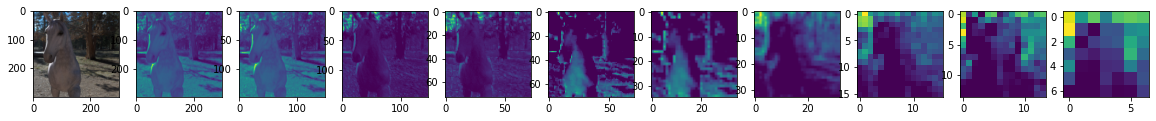

In [17]:
# Display CONVOLUTION = 10 (out of 32/64 possible convolutions)
CONVOLUTION = 10

# nrows = 1 (One for each image)
# ncols = 11 (One column for the input, 10 for visualizing a random convolution (aka filter) and pooling)
figure, axes = plt.subplots(nrows=1, ncols=11, figsize=(20, 20))
for column, c_idx in zip(axes, range(0, 11)):
    # Display the actual image
    if c_idx == 0:
        column.imshow(horse_img)
        
    # Display CONVOLUTION learnt at the first Conv2D layer
    elif c_idx == 1:
        column.imshow(horse_prediction[0][0, : , : , CONVOLUTION])
    
    # Display MAX_POOLING effect
    elif c_idx == 2:
        column.imshow(horse_prediction[1][0, : , : , CONVOLUTION])
    
    # Display CONVOLUTION learnt at the second Conv2D layer
    elif c_idx == 3:
        column.imshow(horse_prediction[2][0, : , : , CONVOLUTION])
    
    # Display MAX_POOLING effect
    elif c_idx == 4:
        column.imshow(horse_prediction[3][0, : , : , CONVOLUTION])
    
    # Display CONVOLUTION learnt at the third Conv2D layer
    elif c_idx == 5:
        column.imshow(horse_prediction[4][0, : , : , CONVOLUTION])
    
    # Display MAX_POOLING effect
    elif c_idx == 6:
        column.imshow(horse_prediction[5][0, : , : , CONVOLUTION])
    
    # Display CONVOLUTION learnt at the fourth Conv2D layer
    elif c_idx == 7:
        column.imshow(horse_prediction[6][0, : , : , CONVOLUTION])
    
    # Display MAX_POOLING effect
    elif c_idx == 8:
        column.imshow(horse_prediction[7][0, : , : , CONVOLUTION])
    
    # Display CONVOLUTION learnt at the fifth Conv2D layer
    elif c_idx == 9:
        column.imshow(horse_prediction[8][0, : , : , CONVOLUTION])
    
    # Display MAX_POOLING effect
    elif c_idx == 10:
        column.imshow(horse_prediction[9][0, : , : , CONVOLUTION])

### Visualize Human

In [18]:
human_prediction = model_for_visualization.predict(human_img.reshape(1, 300, 300, 3))

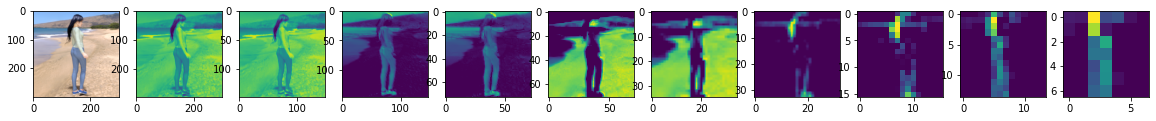

In [20]:
# Display CONVOLUTION = 10 (out of 32/64 possible convolutions)
CONVOLUTION = 10

# nrows = 1 (One for each image)
# ncols = 11 (One column for the input, 10 for visualizing a random convolution (aka filter) and pooling)
figure, axes = plt.subplots(nrows=1, ncols=11, figsize=(20, 20))
for column, c_idx in zip(axes, range(0, 11)):
    # Display the actual image
    if c_idx == 0:
        column.imshow(human_img)
        
    # Display CONVOLUTION learnt at the first Conv2D layer
    elif c_idx == 1:
        column.imshow(human_prediction[0][0, : , : , CONVOLUTION])
    
    # Display MAX_POOLING effect
    elif c_idx == 2:
        column.imshow(human_prediction[1][0, : , : , CONVOLUTION])
    
    # Display CONVOLUTION learnt at the second Conv2D layer
    elif c_idx == 3:
        column.imshow(human_prediction[2][0, : , : , CONVOLUTION])
    
    # Display MAX_POOLING effect
    elif c_idx == 4:
        column.imshow(human_prediction[3][0, : , : , CONVOLUTION])
    
    # Display CONVOLUTION learnt at the third Conv2D layer
    elif c_idx == 5:
        column.imshow(human_prediction[4][0, : , : , CONVOLUTION])
    
    # Display MAX_POOLING effect
    elif c_idx == 6:
        column.imshow(human_prediction[5][0, : , : , CONVOLUTION])
    
    # Display CONVOLUTION learnt at the fourth Conv2D layer
    elif c_idx == 7:
        column.imshow(human_prediction[6][0, : , : , CONVOLUTION])
    
    # Display MAX_POOLING effect
    elif c_idx == 8:
        column.imshow(human_prediction[7][0, : , : , CONVOLUTION])
    
    # Display CONVOLUTION learnt at the fifth Conv2D layer
    elif c_idx == 9:
        column.imshow(human_prediction[8][0, : , : , CONVOLUTION])
    
    # Display MAX_POOLING effect
    elif c_idx == 10:
        column.imshow(human_prediction[9][0, : , : , CONVOLUTION])